
# Tercer Proyecto - Mínimos Cuadrados - Redes Convolucionales

## Estudiantes:
### Ricardo Murillo Jiménez - Carnet: 2018173697
### Ronald Esquivel López - Carnet: 2018093269

In [1]:
# Bibliotecas requeridas para el ejercicio
# Para instalar alguna utilice por ejemplo 
#!pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
   
import numpy as np

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms


# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F


# Pérdida y optimización
import torch.optim as optim

import os

# Pregunta # 3

In [2]:
#Carga y Normalización de los datos

# Dirección de los directorios con las imagenes a usar para etrenar y testear
data_dir = '../Proyecto3/Dataset/train' # entreno
test_dir = '../Proyecto3/Dataset/test' # testeo
valid_dir = '../Proyecto3/Dataset/valid' # validar
classes = os.listdir(data_dir) # Una lista con todas las clases de aves
print(classes)
print(len(classes))

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

In [3]:
from torchvision.datasets import ImageFolder

# Normalización: multiple images are put into a common statistical distribution in terms of size and pixel values
# Data normalization is an important step which ensures that each input parameter (pixel, in this case)
# has a similar data distribution. This makes convergence faster while training the network. ...
# The distribution of such data would resemble a Gaussian curve centered at zero

# To normalize
transform = transforms.Compose( # Transforms are common image transformations. 
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder(data_dir, transform=transform) # Image folder ocupa que las imagenes esten separadas en folderse
                                                    # cada folder siento la etiqueta(label) de cada imagen
testset = ImageFolder(test_dir, transform=transform)
validset = ImageFolder(valid_dir, transform=transform)

In [4]:
print(dataset)
print(testset)

Dataset ImageFolder
    Number of datapoints: 45278
    Root location: ../Proyecto3/Dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset ImageFolder
    Number of datapoints: 1550
    Root location: ../Proyecto3/Dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [5]:
# view one image shape of the dataset.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [6]:
# function for the showing the image.
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))
    
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  AFRICAN CROWNED CRANE (0)


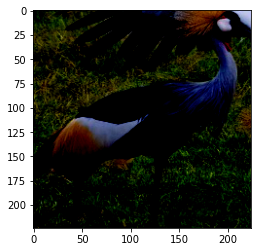

In [7]:
show_image(*dataset[20])

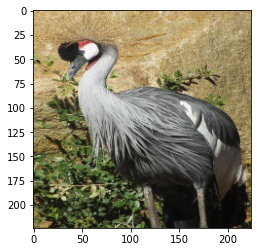

In [8]:
imshow(img)

In [9]:
torch.manual_seed(20)
train_size = len(dataset)
val_size = len(validset)
test_size = len(testset)
print(train_size, val_size, test_size)

45278 1550 1550


In [10]:
train_ds = dataset
val_ds = validset
test_ds = testset

len(train_ds), len(val_ds), len(test_ds) 

(45278, 1550, 1550)

In [11]:
from torch.utils.data.dataloader import DataLoader

batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


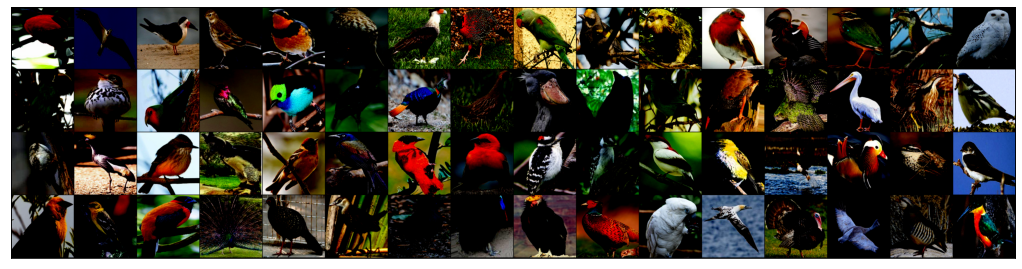

In [12]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(images, nrow=16).permute(1,2,0))
    break

###### ITCR - Sede Interuniversitaria de Alajuela
###### Curso IC-6200 - Inteligencia Artificial
###### Aprendizaje supervisado - Mínimos Cuadrados
###### Redes Neuronales Convolucionales (CNN)
###### Profesora: María Mora